In [14]:

import kagglehub
from array import array
from os.path  import join
import struct
# Add this import at the top of your notebook
import pickle
import os



import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/iiitd/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [3]:
class Mnilogvarataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)       

In [4]:
input_path = '/kaggle/input/mnist-dataset'
training_images_filepath = join(input_path, '/home/iiitd/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, '/home/iiitd/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, '/home/iiitd/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, '/home/iiitd/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = Mnilogvarataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


In [5]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_test,y_test=np.array(x_test),np.array(y_test)

Shape: (60000, 28, 28)
Data type: uint8
Min value: 0
Max value: 255
Mean value: 33.318421449829934


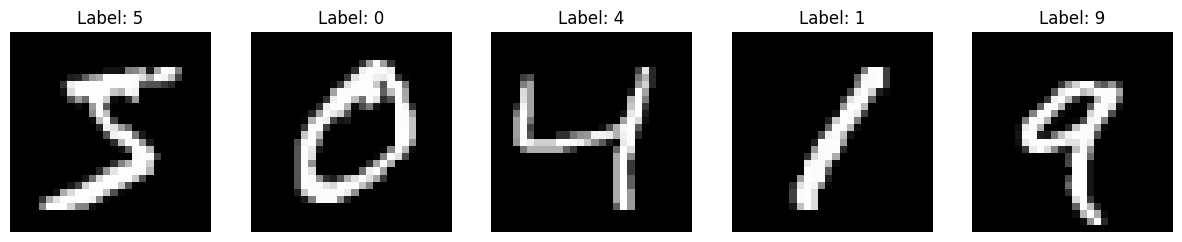

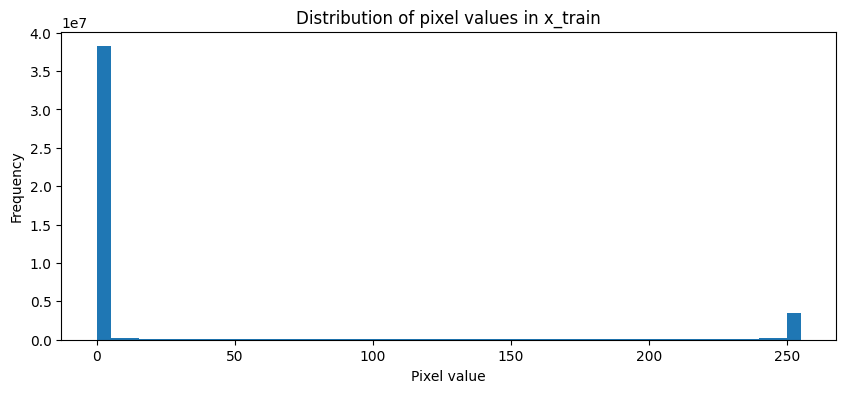


Summary Statistics:
Number of training examples: 60000
Image dimensions: (28, 28)
Number of unique labels: 10
Labels: [0 1 2 3 4 5 6 7 8 9]


In [6]:
# Basic information about x_train
print("Shape:", x_train.shape)
print("Data type:", x_train.dtype)
print("Min value:", x_train.min())
print("Max value:", x_train.max())
print("Mean value:", x_train.mean())

# Sample visualization
plt.figure(figsize=(15, 5))

# Show first few images
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Distribution of pixel values
plt.figure(figsize=(10, 4))
plt.hist(x_train.ravel(), bins=50)
plt.title('Distribution of pixel values in x_train')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("Number of training examples:", len(x_train))
print("Image dimensions:", x_train[0].shape)
print("Number of unique labels:", len(np.unique(y_train)))
print("Labels:", np.unique(y_train))

In [7]:
# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_gradient(x):
    return 1 - np.tanh(x) ** 2

def relu(x):
    # Normalize x to prevent potential numerical instability
    x = (x-x.mean())/x.std()
    return np.maximum(0, x)

def relu_gradient(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_gradient(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

In [8]:
# Weight Initialization Functions
def zero_init(shape):
    return np.zeros(shape)

def random_init(shape, scale=0.01):
    return np.random.rand(*shape) * scale

def normal_init(shape, mean=0.0, std=1.0):
    return np.random.normal(mean, std, shape)

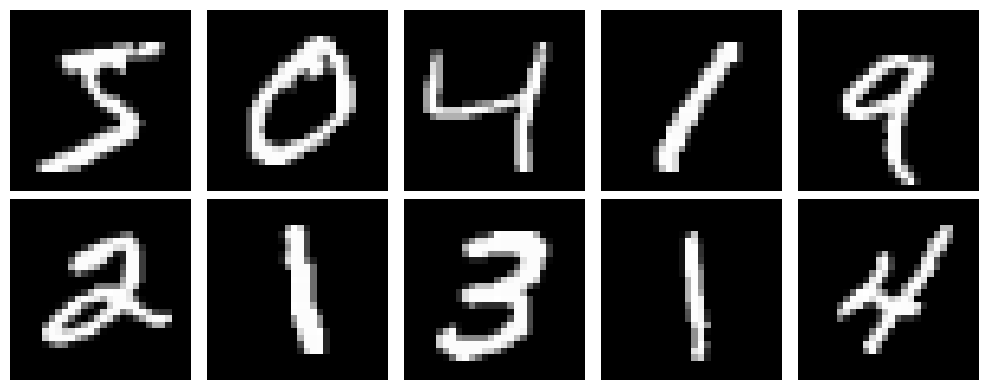

In [9]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray') 
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Preprocess MNIST data
X_train = x_train.reshape(x_train.shape[0], -1) / 255.0  # Flatten and normalize
Y_train = np.eye(10)[y_train]  # Convert to one-hot encoding

In [11]:
class NeuralNetwork:
    def __init__(self, N, layer_sizes, lr=2e-5, activation='relu', weight_init='normal', epochs=100, batch_size=128):
        
        self.N = N
        self.layer_sizes = layer_sizes
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        
        #  activation fns
        self.activation_functions = {
            'sigmoid': (sigmoid, sigmoid_gradient),
            'tanh': (tanh, tanh_gradient),
            'relu': (relu, relu_gradient),
            'leaky_relu': (leaky_relu, leaky_relu_gradient)
        }
        self.activation_function, self.activation_gradient = self.activation_functions[activation]
        
        # initializing weights
        self.weights = []
        self.biases = []
        self.init_weights(weight_init)
        
    def init_weights(self, weight_init):
        
        init_functions = {
            'zero': zero_init,
            'random': random_init,
            'normal': normal_init
        }
        init_func = init_functions[weight_init]
        
        for i in range(len(self.layer_sizes) - 1):
            shape = (self.layer_sizes[i], self.layer_sizes[i + 1])
            self.weights.append(init_func(shape))
            self.biases.append(np.zeros((1, self.layer_sizes[i + 1])))
    
    def forward_propagation(self, X):
        
        self.activations = [X]
        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            # using softmax for last layer
            if i == len(self.weights) - 1:
                a = softmax(z)
            else:
                a = self.activation_function(z)
            self.activations.append(a)
        return self.activations[-1]
    
    def backward_propagation(self, X, Y):
        
        m = X.shape[0]
        delta = self.activations[-1] - Y
        
        # Store gradients
        self.weight_gradients = []
        self.bias_gradients = []
        
        for i in range(len(self.weights) - 1, -1, -1):
            # calculating gradients
            dW = np.dot(self.activations[i].T, delta) / m
            db = np.sum(delta, axis=0, keepdims=True) / m
            
            # storing gradients
            self.weight_gradients.insert(0, dW)
            self.bias_gradients.insert(0, db)
            
            # calculating delta for next layer until last layer
            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self.activation_gradient(self.activations[i])
    
    def fit(self, X, Y):
        self.losses = []
        
        for epoch in range(self.epochs):
            epoch_losses = []
            
            # Mini-batch training
            for i in range(0, len(X), self.batch_size):
                batch_X = X[i:i + self.batch_size]
                batch_Y = Y[i:i + self.batch_size]
                
                # Forward and backward propagation
                self.forward_propagation(batch_X)
                self.backward_propagation(batch_X, batch_Y)
                
                # Update weights and biases
                for j in range(len(self.weights)):
                    self.weights[j] -= self.lr * self.weight_gradients[j]
                    self.biases[j] -= self.lr * self.bias_gradients[j]
                
                # Calculate loss
                predictions = self.forward_propagation(batch_X)
                loss = -np.mean(batch_Y * np.log(predictions + 1e-8))
                epoch_losses.append(loss)
            
            # Store average epoch loss
            avg_loss = np.mean(epoch_losses)
            self.losses.append(avg_loss)
            
            if epoch % 10 == 0:
                print(f'Epoch {epoch}/{self.epochs}, Loss: {avg_loss:.4f}')
    
    def predict(self, X):
        probabilities = self.forward_propagation(X)
        return np.argmax(probabilities, axis=1)
    
    def predict_proba(self, X):
        return self.forward_propagation(X)
    
    def score(self, X, Y):
        predictions = self.predict(X)
        if len(Y.shape) > 1:  # If Y is one-hot encoded
            Y = np.argmax(Y, axis=1)
        return np.mean(predictions == Y)


Training with activation=relu, weight_init=normal
Epoch 0/100, Loss: 0.3237
Epoch 10/100, Loss: 0.0742
Epoch 20/100, Loss: 0.0548
Epoch 30/100, Loss: 0.0470
Epoch 40/100, Loss: 0.0429
Epoch 50/100, Loss: 0.0407
Epoch 60/100, Loss: 0.0397
Epoch 70/100, Loss: 0.0398
Epoch 80/100, Loss: 0.0406
Epoch 90/100, Loss: 0.0422


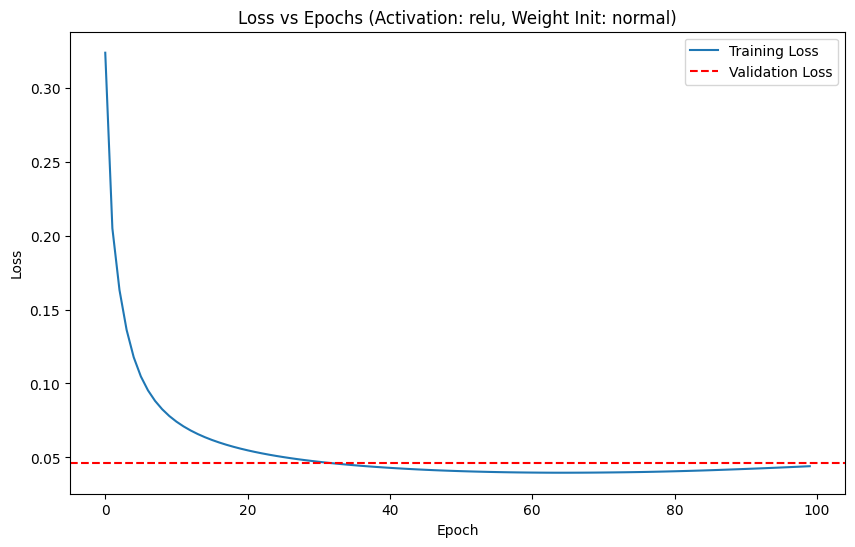


Training with activation=relu, weight_init=zero


/tmp/ipykernel_88418/2049558116.py:17: RuntimeWarning: invalid value encountered in divide
  x = (x-x.mean())/x.std()


Epoch 0/100, Loss: nan
Epoch 10/100, Loss: nan
Epoch 20/100, Loss: nan
Epoch 30/100, Loss: nan
Epoch 40/100, Loss: nan
Epoch 50/100, Loss: nan
Epoch 60/100, Loss: nan
Epoch 70/100, Loss: nan
Epoch 80/100, Loss: nan
Epoch 90/100, Loss: nan


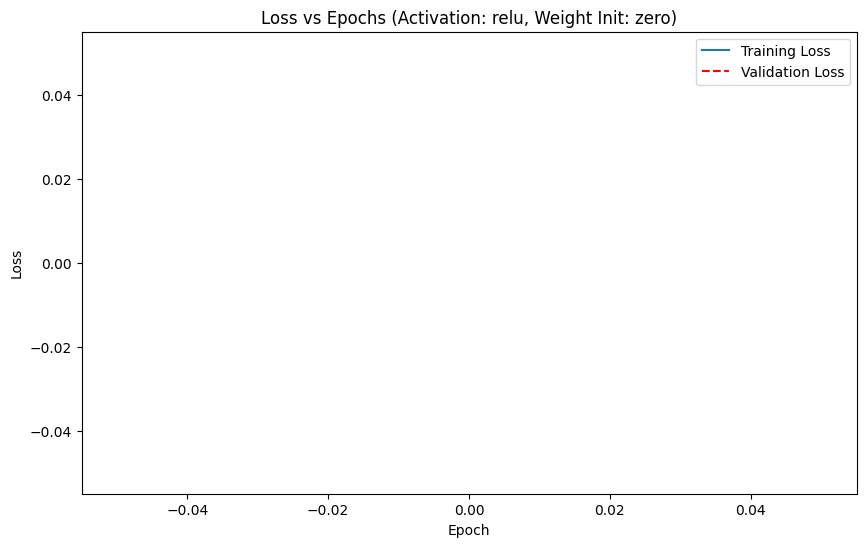


Training with activation=relu, weight_init=random
Epoch 0/100, Loss: 0.2298
Epoch 10/100, Loss: 0.2279
Epoch 20/100, Loss: 0.2269
Epoch 30/100, Loss: 0.2263
Epoch 40/100, Loss: 0.2259
Epoch 50/100, Loss: 0.2257
Epoch 60/100, Loss: 0.2255
Epoch 70/100, Loss: 0.2253
Epoch 80/100, Loss: 0.2251
Epoch 90/100, Loss: 0.2250


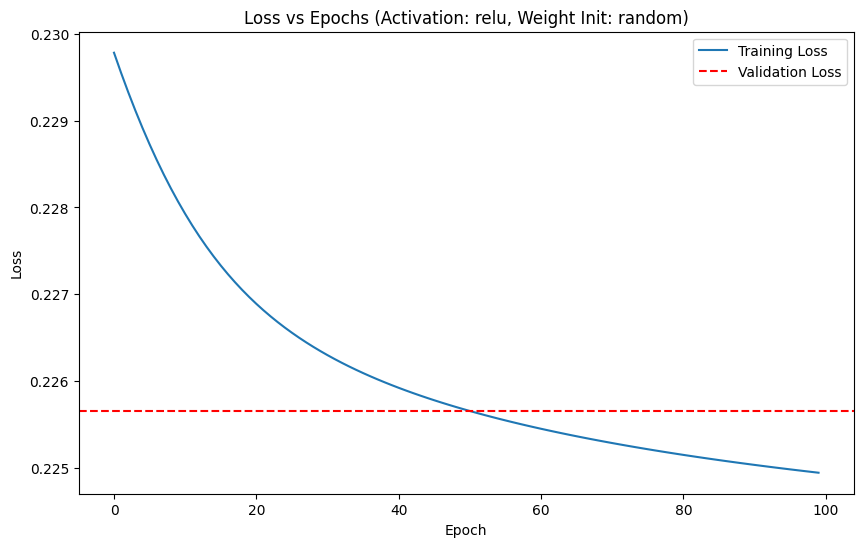


Training with activation=leaky_relu, weight_init=normal
Epoch 0/100, Loss: 1.2659
Epoch 10/100, Loss: 1.0606
Epoch 20/100, Loss: 0.9167
Epoch 30/100, Loss: 0.8040
Epoch 40/100, Loss: 0.7162
Epoch 50/100, Loss: 0.6514
Epoch 60/100, Loss: 0.6008
Epoch 70/100, Loss: 0.5615
Epoch 80/100, Loss: 0.5308
Epoch 90/100, Loss: 0.5046


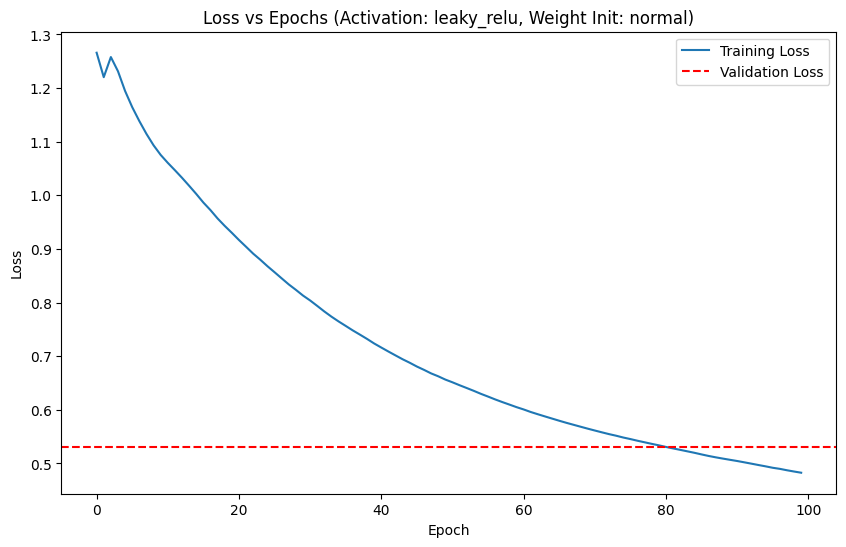


Training with activation=leaky_relu, weight_init=zero
Epoch 0/100, Loss: 0.2303
Epoch 10/100, Loss: 0.2303
Epoch 20/100, Loss: 0.2303
Epoch 30/100, Loss: 0.2303
Epoch 40/100, Loss: 0.2302
Epoch 50/100, Loss: 0.2302
Epoch 60/100, Loss: 0.2302
Epoch 70/100, Loss: 0.2302
Epoch 80/100, Loss: 0.2302
Epoch 90/100, Loss: 0.2302


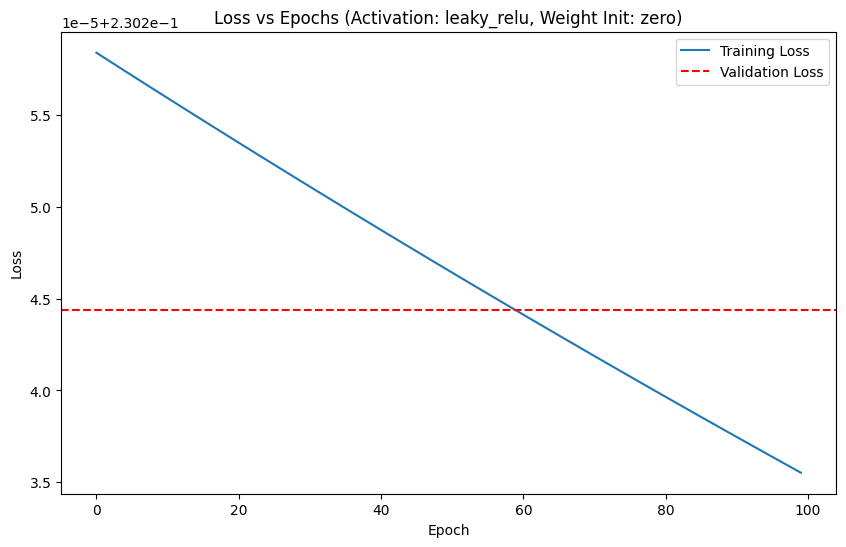


Training with activation=leaky_relu, weight_init=random
Epoch 0/100, Loss: 0.2303
Epoch 10/100, Loss: 0.2302
Epoch 20/100, Loss: 0.2302
Epoch 30/100, Loss: 0.2302
Epoch 40/100, Loss: 0.2302
Epoch 50/100, Loss: 0.2302
Epoch 60/100, Loss: 0.2302
Epoch 70/100, Loss: 0.2302
Epoch 80/100, Loss: 0.2301
Epoch 90/100, Loss: 0.2301


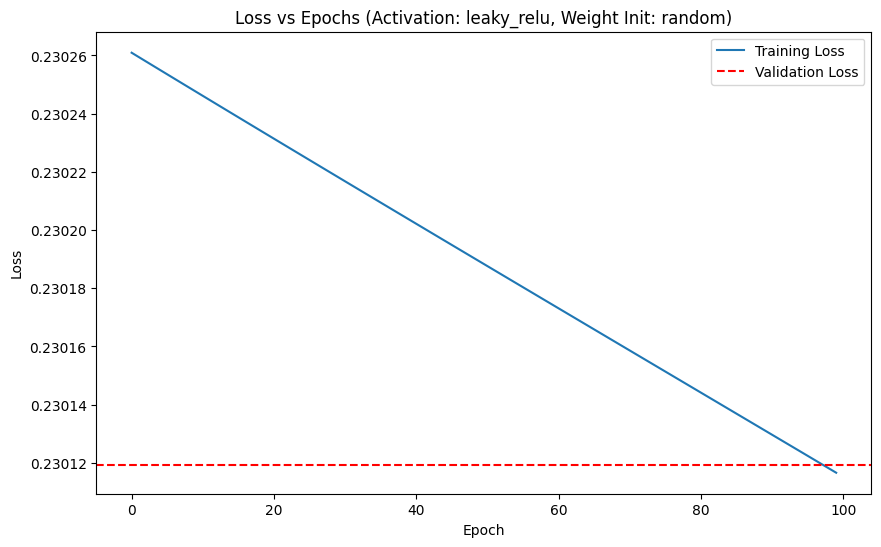


Training with activation=tanh, weight_init=normal
Epoch 0/100, Loss: 0.6835
Epoch 10/100, Loss: 0.3226
Epoch 20/100, Loss: 0.2442
Epoch 30/100, Loss: 0.2083
Epoch 40/100, Loss: 0.1860
Epoch 50/100, Loss: 0.1723
Epoch 60/100, Loss: 0.1609
Epoch 70/100, Loss: 0.1538
Epoch 80/100, Loss: 0.1461
Epoch 90/100, Loss: 0.1406


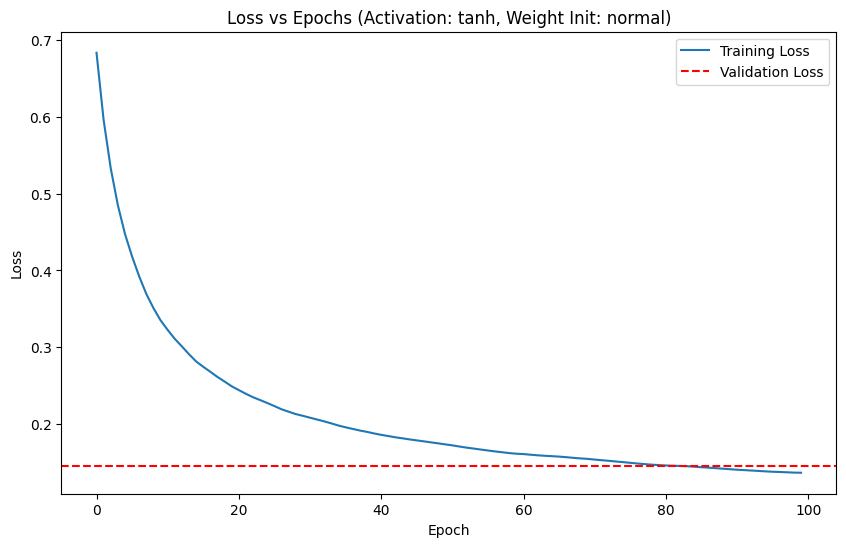


Training with activation=tanh, weight_init=zero
Epoch 0/100, Loss: 0.2303
Epoch 10/100, Loss: 0.2303
Epoch 20/100, Loss: 0.2303
Epoch 30/100, Loss: 0.2303
Epoch 40/100, Loss: 0.2302
Epoch 50/100, Loss: 0.2302
Epoch 60/100, Loss: 0.2302
Epoch 70/100, Loss: 0.2302
Epoch 80/100, Loss: 0.2302
Epoch 90/100, Loss: 0.2302


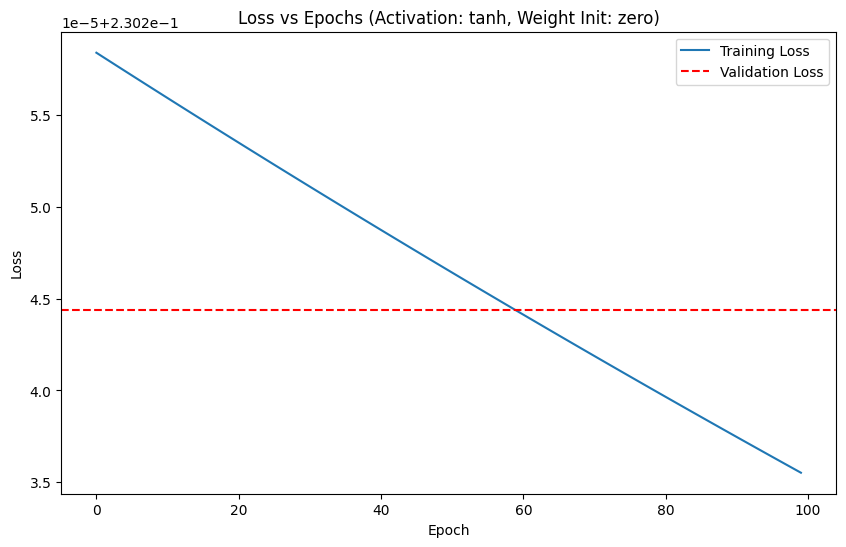


Training with activation=tanh, weight_init=random
Epoch 0/100, Loss: 0.2303
Epoch 10/100, Loss: 0.2303
Epoch 20/100, Loss: 0.2303
Epoch 30/100, Loss: 0.2302
Epoch 40/100, Loss: 0.2302
Epoch 50/100, Loss: 0.2302
Epoch 60/100, Loss: 0.2302
Epoch 70/100, Loss: 0.2302
Epoch 80/100, Loss: 0.2302
Epoch 90/100, Loss: 0.2302


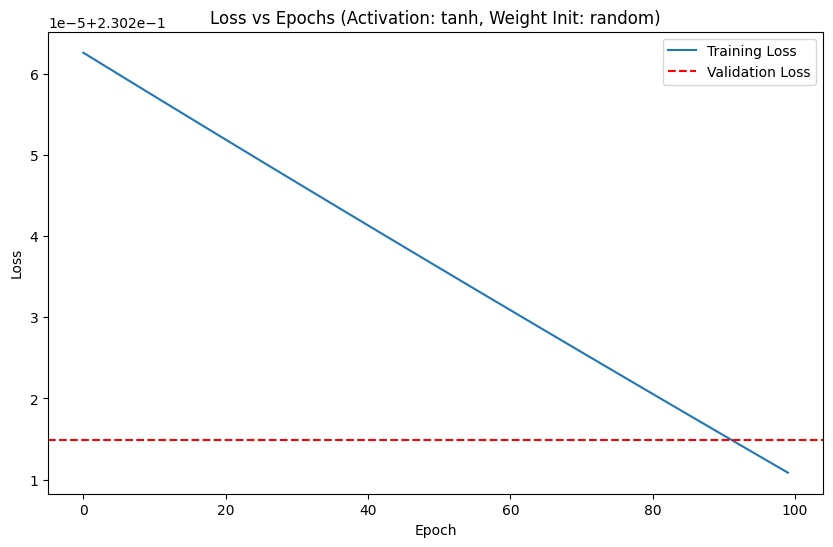


Training with activation=sigmoid, weight_init=normal
Epoch 0/100, Loss: 0.6957
Epoch 10/100, Loss: 0.5481
Epoch 20/100, Loss: 0.4709
Epoch 30/100, Loss: 0.3999
Epoch 40/100, Loss: 0.3447
Epoch 50/100, Loss: 0.3062
Epoch 60/100, Loss: 0.2810
Epoch 70/100, Loss: 0.2640
Epoch 80/100, Loss: 0.2526
Epoch 90/100, Loss: 0.2455


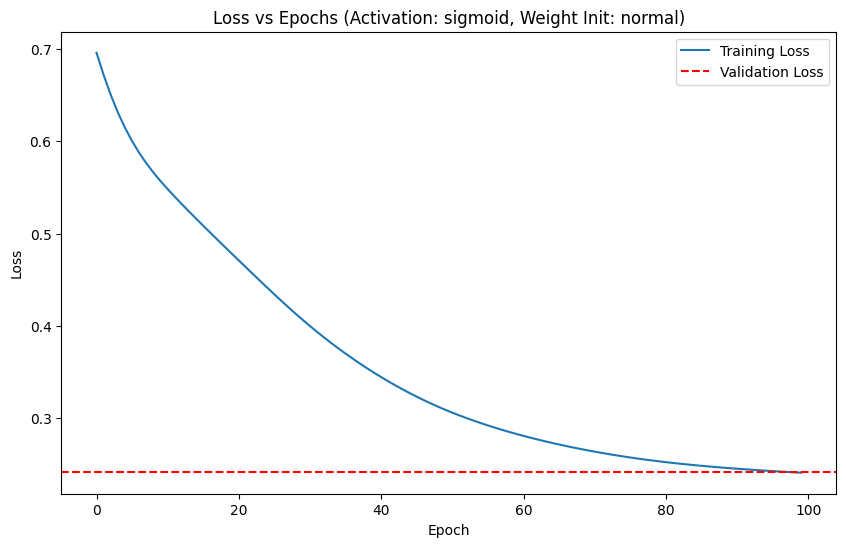


Training with activation=sigmoid, weight_init=zero
Epoch 0/100, Loss: 0.2303
Epoch 10/100, Loss: 0.2302
Epoch 20/100, Loss: 0.2302
Epoch 30/100, Loss: 0.2302
Epoch 40/100, Loss: 0.2302
Epoch 50/100, Loss: 0.2302
Epoch 60/100, Loss: 0.2302
Epoch 70/100, Loss: 0.2302
Epoch 80/100, Loss: 0.2301
Epoch 90/100, Loss: 0.2301


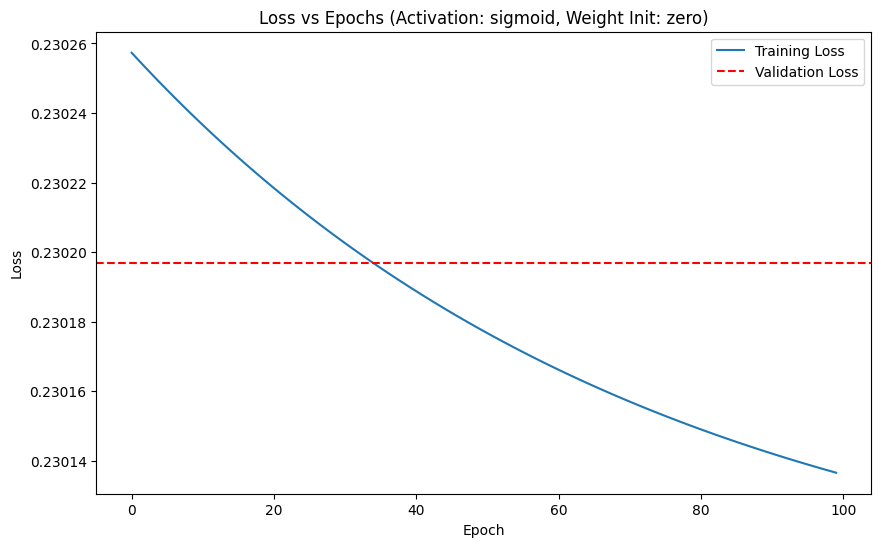


Training with activation=sigmoid, weight_init=random
Epoch 0/100, Loss: 0.2303
Epoch 10/100, Loss: 0.2302
Epoch 20/100, Loss: 0.2302
Epoch 30/100, Loss: 0.2302
Epoch 40/100, Loss: 0.2302
Epoch 50/100, Loss: 0.2302
Epoch 60/100, Loss: 0.2302
Epoch 70/100, Loss: 0.2302
Epoch 80/100, Loss: 0.2301
Epoch 90/100, Loss: 0.2301


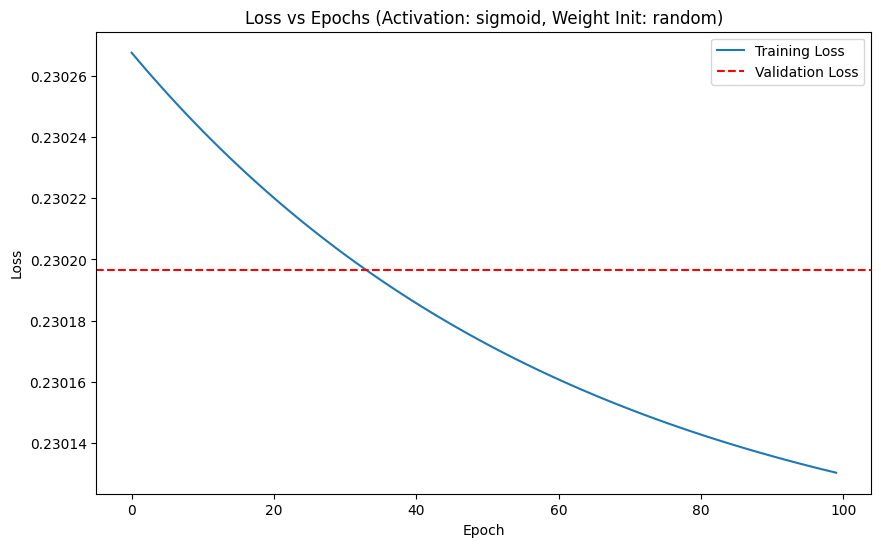


Test Accuracies:
relu_normal: 0.9192
relu_zero: 0.0978
relu_random: 0.1602
leaky_relu_normal: 0.6312
leaky_relu_zero: 0.1050
leaky_relu_random: 0.1278
tanh_normal: 0.7328
tanh_zero: 0.1050
tanh_random: 0.1268
sigmoid_normal: 0.1870
sigmoid_zero: 0.1050
sigmoid_random: 0.1050


In [17]:


# Split data into train, validation and test (80:10:10)
train_size = int(0.8 * len(X_train))
val_size = int(0.1 * len(X_train))
test_size = len(X_train) - train_size - val_size

X_train_split = X_train[:train_size]
X_val = X_train[train_size:train_size+val_size]
X_test = X_train[train_size+val_size:]

Y_train_split = Y_train[:train_size]
Y_val = Y_train[train_size:train_size+val_size]
Y_test = Y_train[train_size+val_size:]

# Training loop for different combinations
activation_fns = ['relu', 'leaky_relu', 'tanh', 'sigmoid']
weight_init = ['normal', 'zero', 'random']

# Store models and their histories
models = {}
histories = {}

for A in activation_fns:
    for WI in weight_init:
        print(f"\nTraining with activation={A}, weight_init={WI}")
        
        model = NeuralNetwork(
            N=6,
            layer_sizes=[784, 256, 128, 64, 32, 10],
            lr=2e-5,
            activation=A,
            weight_init=WI,
            epochs=100,
            batch_size=128
        )
        
        # Train the model
        model.fit(X_train_split, Y_train_split)
        
        # Calculate validation loss
        val_pred = np.clip(model.predict_proba(X_val), 1e-10, 1-1e-10)  # Clip predictions to avoid log(0)
        val_loss = -np.mean(np.sum(Y_val * np.log(val_pred), axis=1))
        
        # Plot training and validation loss
        plt.figure(figsize=(10, 6))
        plt.plot(model.losses, label='Training Loss')
        plt.axhline(y=val_loss, color='r', linestyle='--', label='Validation Loss')
        plt.title(f'Loss vs Epochs (Activation: {A}, Weight Init: {WI})')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Save model and history
        models[f"{A}_{WI}"] = model
        histories[f"{A}_{WI}"] = {
            'train_loss': model.losses,
            'val_loss': val_loss,
            'test_acc': model.score(X_test, Y_test)
        }

# Print test accuracies
print("\nTest Accuracies:")
for key, history in histories.items():
    print(f"{key}: {history['test_acc']:.4f}")




In [18]:
os.makedirs('trained_models', exist_ok=True)

# Save each model
for model_name, model in models.items():
    filename = f'trained_models/{model_name}_model.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved model: {filename}")

# To load and test the models later, you can use:
def load_and_test_model(model_name, X_test, Y_test):
    filename = f'trained_models/{model_name}_model.pkl'
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    accuracy = model.score(X_test, Y_test)
    print(f"Model {model_name} Test Accuracy: {accuracy:.4f}")
    return model


Saved model: trained_models/relu_normal_model.pkl
Saved model: trained_models/relu_zero_model.pkl
Saved model: trained_models/relu_random_model.pkl
Saved model: trained_models/leaky_relu_normal_model.pkl
Saved model: trained_models/leaky_relu_zero_model.pkl
Saved model: trained_models/leaky_relu_random_model.pkl
Saved model: trained_models/tanh_normal_model.pkl
Saved model: trained_models/tanh_zero_model.pkl
Saved model: trained_models/tanh_random_model.pkl
Saved model: trained_models/sigmoid_normal_model.pkl
Saved model: trained_models/sigmoid_zero_model.pkl
Saved model: trained_models/sigmoid_random_model.pkl
